## Shapley Additive Explanations (SHAP)

Instead of trying to understand the complex mechanisms of the classifier itself, SHapley Additive exPlanations (SHAP) treats the model like a black box, it sees the input (i.e., the cat image) and the output (i.e., the ‘cat' label), but the inner workings are a mystery. To understand how the model arrives at its answers, SHAP borrows an idea from game theory called shapley values.

Think of each pixel in the image as a player on a team all with one common goal: to secure the ‘cat' classification. SHAP knows that pixels do not work alone. Instead, it strategically assembles various ‘coalitions' of these pixel players. One coalition might temporarily hide the cat's eyes, another might blur the outline of its tail. For each possible coalition, SHAP observes how the model's confidence in the ‘cat' label changes. If hiding the eyes causes a major dip in the ‘cat' score, SHAP recognizes those eyes as essential evidence in favor of the ‘cat' prediction. Contrarily, does masking a dog-like toy in the background cause an increase in the ‘cat' prediction? That toy is then identified as a potential distraction the model had to learn how to deal with.

SHAP produces visual explanations to increase our understanding. It creates maps that highlight regions of importance in the image. Pixels with positive SHAP values (often colored red) are those that push the prediction towards the ‘cat' label, while those with negative SHAP values (usually blue) pull the prediction away from it. These maps reveal which parts of the image were most influential in the model's decision-making process.

Imagine each successful pixel coalition that obtains the ‘cat' classification is awarded a prize. But how do you fairly distribute that prize among all the individual players (i.e., pixels) within the team? SHAP introduces shapley values to ensure fairness. The shapley value for each pixel considers all possible team (i.e., coalition) combinations that exclude that specific pixel. This comprehensive approach allows SHAP to pinpoint the unique and essential contribution of each pixel, even when it collaborated with teammates in different coalitions.

Let us delve a little deeper into the mathematical foundations of SHAP. Suppose our image classifier is a complex function, _f_, that takes an image, _x_, as input and outputs probability scores for ‘cat' and ‘dog'. We are particularly interested in the probability of ‘cat', denoted as _f(x)[cat]_. For a specific set of image features, denoted by _S_ (think of _S_ as a coalition of pixels), SHAP shows us how the model's prediction for ‘cat' changes relative to a baseline (often the entire image) when those features are present vs. absent:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>&#x3D5;</mi>
    <mi>i</mi>
  </msub>
  <mo>=</mo>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mi>S</mi>
  </msub>
  <mo>&#x222A;</mo>
  <mrow data-mjx-texclass="ORD">
    <mi>i</mi>
  </mrow>
  <msub>
    <mo stretchy="false">)</mo>
    <mo stretchy="false">[</mo>
  </msub>
  <mi>c</mi>
  <mi>a</mi>
  <mi>t</mi>
  <mo stretchy="false">]</mo>
  <mo>&#x2212;</mo>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mi>S</mi>
  </msub>
  <msub>
    <mo stretchy="false">)</mo>
    <mo stretchy="false">[</mo>
  </msub>
  <mi>c</mi>
  <mi>a</mi>
  <mi>t</mi>
  <mo stretchy="false">]</mo>
</math>

Here,<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtable displaystyle="true" columnalign="right left" columnspacing="0em" rowspacing="3pt">
    <mtr>
      <mtd></mtd>
      <mtd>
        <msub>
          <mi>&#x3D5;</mi>
          <mi>i</mi>
        </msub>
      </mtd>
    </mtr>
  </mtable>
</math> represents the contribution of feature _i_ (i.e., a pixel or group of pixels) to the ‘cat' prediction. The core of the SHAP method lies in the calculation of shapley values, a weighted average of a feature's contributions across all possible coalitions excluding it:



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>&#x3D5;</mi>
    <mi>i</mi>
  </msub>
  <mo>=</mo>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>S</mi>
      <mo>&#x2286;</mo>
      <mi>N</mi>
      <mo>&#x2216;</mo>
      <mrow data-mjx-texclass="ORD">
        <mi>i</mi>
      </mrow>
    </mrow>
  </munder>
  <mfrac>
    <mrow>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mi>S</mi>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mo>!</mo>
      <mo stretchy="false">(</mo>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mi>N</mi>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mo>&#x2212;</mo>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mi>S</mi>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mo>&#x2212;</mo>
      <mn>1</mn>
      <mo stretchy="false">)</mo>
      <mo>!</mo>
    </mrow>
    <mrow>
      <mi>N</mi>
      <mo>!</mo>
    </mrow>
  </mfrac>
  <mo stretchy="false">[</mo>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mi>S</mi>
  </msub>
  <mo>&#x222A;</mo>
  <mrow data-mjx-texclass="ORD">
    <mi>i</mi>
  </mrow>
  <msub>
    <mo stretchy="false">)</mo>
    <mo stretchy="false">[</mo>
  </msub>
  <mi>c</mi>
  <mi>a</mi>
  <mi>t</mi>
  <mo stretchy="false">]</mo>
  <mo>&#x2212;</mo>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mi>S</mi>
  </msub>
  <msub>
    <mo stretchy="false">)</mo>
    <mo stretchy="false">[</mo>
  </msub>
  <mi>c</mi>
  <mi>a</mi>
  <mi>t</mi>
  <mo stretchy="false">]</mo>
</math>

SHAP offers several advantages for interpreting complex machine learning models. Like LIME, it is model-agnostic, meaning it can be applied to a wide range of models, regardless of their internal structure. Additionally, SHAP goes beyond LIME's focus on local fidelity, providing explanations that help us understand how the model generally makes decisions. Its reliance on shapley values ensures a fair distribution of credit to each feature for its contribution to the final prediction. However, SHAP also has some limitations. Calculating shapley values can be computationally demanding, especially for large datasets or complex models.

### **The KernelShap method**

In their [paper](https://arxiv.org/abs/1705.07874), the authors propose to use:
> SHAP (SHapley Additive exPlanation) Values as a unified measured of feature importance

The KernelShap method from Xplique is based on the Lime method, it uses shapley values to define the perturbation function, the similarity function and the approximate function.

- The perturbation function, it draws the number of features to perturbed $k$ (with $n$ the total number of features) following the distribution $p$, then the $k$ features are selected randomly and perturbed to the reference value given to the method. $$p(k) = \frac{n-1}{k*(n-k)}$$
- The similarity function $\pi_x$ is defined as the number of perturbed features, $\pi_x = k$.
- The approximation function $g$ is defined as a linear regression.



### Parameter overview

As most methods of the Xplique library, an explanation method have a few number of attributes (and their default values) useful to increase your explanation quality.

```python
explainer = KernelShap(model: Callable,
                       batch_size: int = 32,
                       map_to_interpret_space: Optional[Callable] = None,
                       nb_samples: int = 800,
                       ref_value: Optional[np.ndarray] = None)
                       )
```

```python
explainer = Lime(
        self,
        model: Callable,
        batch_size: int = 32,
        interpretable_model: Any = linear_model.Ridge(alpha=2),
        similarity_kernel: Optional[Callable[[tf.Tensor, tf.Tensor, tf.Tensor], tf.Tensor]] = None,
        pertub_func: Optional[Callable[[Union[int, tf.Tensor],int], tf.Tensor]] = None,
        map_to_interpret_space: Optional[Callable[[tf.Tensor], tf.Tensor]] = None,
        ref_value: Optional[np.ndarray] = None,
        nb_samples: int = 150,
        distance_mode: str = "euclidean",
        kernel_width: float = 45.0,
        prob: float = 0.5
        )
```

**Common parameters:**

- The `batch_size` define the number of inputs to treat simultaneously. (Positive integer).

- The `map_to_interpret_space` is a function used to obtained the interpretable representation of a sample. In practice, it groups features of an input corresponding to the same interpretable feature (e.g super-pixel) together. It allows to transpose from (resp. to) the original input space to (resp. from) the interpretable space. By default, the quickshift function is used. (Segementation function from `skimage.segmentation`).

- The `nb_samples` parameter is the number of perturbed samples generated for each input (images, timeseries). It you refer to the [methods definitions](#intro) is the number of samples used by the $g$ function to learn and approximate the model $f$. (Positive integer).

- The `ref_value` defines the reference value which replaces each feature when the corresponding interpretable feature is set to 0. It should be provided as: a ndarray of shape (1) if there is no channels in your input and (C,) otherwise. The default ref value is set to (0.5,0.5,0.5) for inputs with 3 channels (corresponding to a grey pixel when inputs are normalized by 255) and to 0 otherwise. (Array of float values, one value by channel).

**Lime specific parameters:** (and used values for KernelShap)

- The `interpretable_model` is a model object to train an interpretable model that will approximate the model locally. It correspond to the model behind the $g$ function in [the methods definition](#intro). (KernelShap uses a linear regression). (function from `sklearn.linear_model`).

- The `similarity_kernel` is a function which considering an input, perturbed instances of these input and the interpretable version of those perturbed samples compute the similarities between the input and the perturbed samples. It was described as $\pi_x$ in [the methods definition](#intro). (KernelShap uses the number of perturbed features (super-pixels) ($\pi_x = k$)).

- The `pertub_function` is a function which generate perturbed interpretable samples in the interpretation space from the number of interpretable features (e.g nb of super pixel) and the number of perturbed samples you want per original input. Perturbed features are afterward set to `ref_value`. (KernelShap randomly draws a number of features to perturb $k$ than randomly select $k$ features to perturb).

- The `distance_mode` parameter is used in the default similarity kernel. It defines the distance used. (Either "euclidean" or "cosine").

- The `kernel_width` parameter is the width of your similarity kernel. (Positive value).

- The `prob` parameter is the probability argument for the default pertub function. (Value between 0. and 1.).

The detail on each attribute influence will be provided in the [Common parameters influence](#influence) and [Lime specific parameters influence](#lime_influence) sections.

## Parameter tuning tips

**Common parameters:**

- The `batch_size` represents the number of perturbed images treated simultaneously. It has an impact on the memory usage. You may use the batch size from your model training.

- The `map_to_interpret_space` is a function grouping coherent pixels together (image segmentation). The functions doing segmentation have several parameters, tuning them may take some time. Thus, we suggest to modify it only if the super-pixels do not make sense on your image. For Timeseries, you should also build an identity mapping, see at the end of [the documentation](https://deel-ai.github.io/xplique/api/attributions/lime/) for more information.

- The `nb_samples` represents the number of samples (perturbed sample) used by the estimator for each sample (image, timeseries...). The right setting is the smallest value after which the explanation are stable. This means that more sample will not make the explanation more precise. `nb_samples` default value is (150 for Lime, 800 for KernelShap), the bigger the input size, the bigger should be the number of samples.

- The `ref_value` defines the reference value which replaces each feature when the corresponding interpretable feature is set to 0. It should represent non-information. 0 or the mean of your values are often good values. If you have several channels, the different values should represent the same thing (i.e all zeros or all means along the channel).

**Lime specific parameters:** (and used values for KernelShap)

- The `interpretable_model` parameter represents an interpretable model object, this model is train on pertubed samples to approximate the original model locally. It is hard to predict the impact of such parameter, thus if you not have a deep understanding and a goal in mind, we do not suggest to modify this parameter. (To see the default function, see below in the corresponding paragraph).

- The `similarity_kernel` is a function for measuring the similarity between perturbed samples and the original input. To change this parameter you need to write a custom function, which ask for a good understanding of the method. Therefore, we suggest to modify this function via the `distance_mode` and `kernel_width` parameters. (To see the default function, see below in the corresponding paragraph).

- The `pertub_function` is a function which generate perturbed interpretable samples in the interpretation space. To change this parameter, you also need a custom function. Therefore to modify the `pertub_function` we suggest to do it via the `prob` parameter. (To see the default function, see below with parameter details).

- The `distance_mode` is the dist parameter used by the default `similarity_kernel` function. It is either "euclidean" or "cosine", both are pertinent and should be tried. ("euclidean" is the default).

- The `kernel_width` is the width of the default `similarity_kernel` function. This parameter depend on the input size, the default value is 45, it is tuned for 224x224 images. You may use 1 for tabular data or small time series. While a bigger value should be taken for bigger images. It is important to make it evolving depending on your inputs size otherwise you will get all similarity close to 0 leading to poor performance or errors.

- The `prob` parameter is used by the default `perturb_function`. It determines the probability of a feature (super-pixel) to be perturbed. The value should stay between 0.1 and 0.9. (The default value is 0.5).

In [9]:
import os
import numpy as np
import tensorflow
import skimage as ski
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import concurrent.futures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, Dropout
from keras.optimizers import Adam
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from math import ceil
from time import time
import xplique
from xplique.attributions import IntegratedGradients
from xplique.plots import plot_attributions
import skimage.segmentation as seg
import skimage
import copy
import sklearn
from sklearn.linear_model import LinearRegression
from skimage.segmentation import quickshift, felzenszwalb, watershed, slic
from skimage.color import rgb2gray
from skimage.filters import sobel

import xplique
from xplique.attributions import Lime, KernelShap
from xplique.plots import plot_attributions

In [2]:
# Folder paths where the images of each class are stored
folder_paths = ['cats_and_dogs/cats','cats_and_dogs/dogs']

# Class labels for the images (same order as folder_paths)
class_names = ["cats", 'dogs']

# Target size to resize the images
target_size = (224, 224)

# Arrays to store the images (X) and class labels (y)
X = []
y = []

for i in range(len(folder_paths)):
    for filename in os.listdir(folder_paths[i]):
        file_extension = os.path.splitext(filename)[1]
        # Check if the file extension is an image extension 
        if file_extension == ".jpg" or file_extension == ".jpeg" or file_extension == ".png": 
            image_filename = os.path.join(folder_paths[i], filename)
            # Read the image file using scikit-image
            image = ski.io.imread(image_filename)
            # Normalize the image to values between 0 and 1
            image = image / 255.0
            # Resize the image to the target_size
            image_resized = ski.transform.resize(image, target_size)            
            # Insert the image into array X
            X.append(image_resized)
            # Insert the class label into array y
            y.append(class_names[i])
            
# Convert of arrays into numpy arrays
X = np.array(X)
y = np.array(y)

In [3]:
data_gen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             zoom_range=0.2)

def GenerateImages(generator, image, num_images):
    new_images = []
    # we need to reshape the image because the generator.flow() 
    # expects an array of images
    image = np.reshape(image, (1,) + image.shape)
    for _ in range(num_images):
        batch = next(generator.flow(image, batch_size=1))
        new_images.append(batch[0])
    return np.array(new_images)

# Save the images to a new dataset 'X_augmented' and 'y_augmented'
X_augmented = []
y_augmented = []
for index in range(len(X)):
    images = GenerateImages(data_gen, X[index], 6)
    for i in range(6):
        X_augmented.append(images[i])
        y_augmented.append(y[index]) 

In [4]:
# Convert lists to numpy arrays
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

In [5]:
# Encode the class labels into integers
label_encoder = LabelEncoder()
y_integer_encoded = label_encoder.fit_transform(y_augmented)  
num_classes = len(np.unique(y_integer_encoded))
y_onehot_encoded = keras.utils.to_categorical(y_integer_encoded, num_classes=num_classes)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented,
                                                    y_onehot_encoded,
                                                    test_size=1/10,
                                                    random_state=0)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 1/10,
                                                  random_state = 0)

In [7]:
# Create a sequential model
model = Sequential()

# Add convolutional layers, max pooling, and dropout layers
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=target_size + (3,), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64))

# Output layer
model.add(Dense(2, activation='softmax'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=3)

# Train the model 
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=monitor_val_acc)

Epoch 1/100


2024-04-30 22:32:43.550562: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


456/456 [==============================] - 61s 133ms/step - loss: 0.6829 - accuracy: 0.5488 - val_loss: 0.6452 - val_accuracy: 0.6136
Epoch 2/100
456/456 [==============================] - 64s 141ms/step - loss: 0.6169 - accuracy: 0.6525 - val_loss: 0.5806 - val_accuracy: 0.6938
Epoch 3/100
456/456 [==============================] - 71s 156ms/step - loss: 0.5645 - accuracy: 0.7007 - val_loss: 0.5679 - val_accuracy: 0.7123
Epoch 4/100
456/456 [==============================] - 72s 157ms/step - loss: 0.5153 - accuracy: 0.7399 - val_loss: 0.5354 - val_accuracy: 0.7463
Epoch 5/100
456/456 [==============================] - 67s 147ms/step - loss: 0.4526 - accuracy: 0.7824 - val_loss: 0.5493 - val_accuracy: 0.7370
Epoch 6/100
456/456 [==============================] - 70s 153ms/step - loss: 0.3610 - accuracy: 0.8368 - val_loss: 0.6482 - val_accuracy: 0.7191
Epoch 7/100
456/456 [==============================] - 68s 148ms/step - loss: 0.2394 - accuracy: 0.8988 - val_loss: 0.7292 - val_accurac

### SHAP Implementation

In [ ]:
preds = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(preds, axis=1)
# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Extract wrongly classified and correctly classified images
wrongly_classified_images = []
correctly_classified_images = []

for i in range(len(y_true_labels)):
    if y_pred_labels[i] != y_true_labels[i]:
        # Image is wrongly classified
        wrongly_classified_images.append(X_test[i])
    else:
        # Image is correctly classified
        correctly_classified_images.append(X_test[i])

# Convert lists to numpy arrays
wrongly_classified_images = np.array(wrongly_classified_images)
correctly_classified_images = np.array(correctly_classified_images)

# Print the number of wrongly classified and correctly classified images
print("Number of wrongly classified images:", len(wrongly_classified_images))
print("Number of correctly classified images:", len(correctly_classified_images))

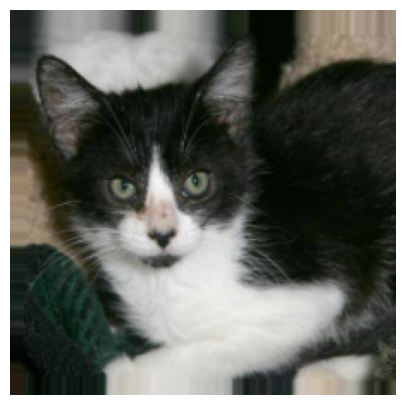

In [13]:
x = np.expand_dims(X_test[300], axis=0)  # Expand dimension for image
y = np.expand_dims(tf.keras.utils.to_categorical(1, 2), axis=0)

plt.rcParams["figure.figsize"] = [12.5, 5]
plt.imshow(x[0])
plt.axis('off')
plt.show()

KernelShap


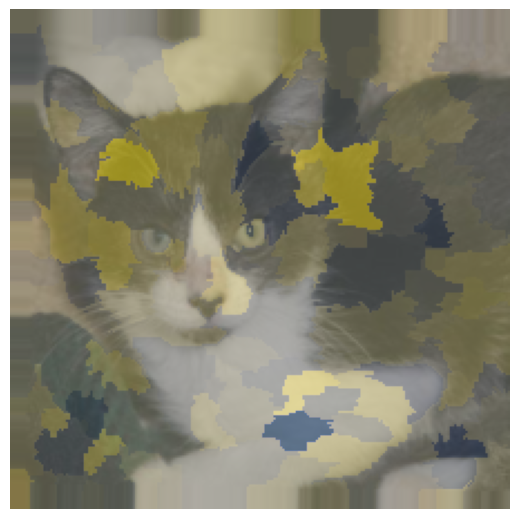

In [14]:
# define arbitrary parameters (common for all methods)
common_parameters = {
    "model": model,
    "batch_size": 16,
    "map_to_interpret_space": None,  # will use the default function
    "nb_samples": 4000,
    "ref_value": None,  # default value  will use (0.5, 0.5, 0.5) for images
}

# instanciate one explainer for each method
explainer = {
    "KernelShap": KernelShap(**common_parameters),
}

# iterate on all methods
for method_name, explainer in explainer.items():
    # compute explanation by calling the explainer
    explanation = explainer.explain(x, y)

    # visualize explanation with plot_explanation() function
    print(method_name)
    plot_attributions(explanation, x, img_size=5, cmap='cividis', cols=1, alpha=0.6)
    plt.show()

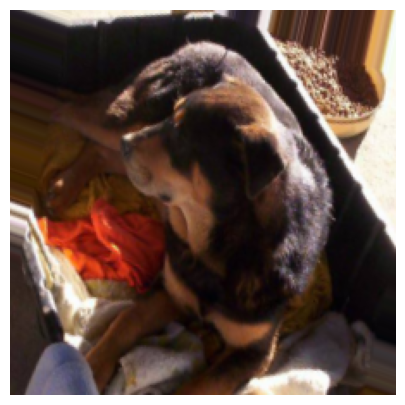

In [19]:
x = np.expand_dims(X_test[380], axis=0)  # Expand dimension for image
y = np.expand_dims(tf.keras.utils.to_categorical(1, 2), axis=0)

plt.rcParams["figure.figsize"] = [12.5, 5]
plt.imshow(x[0])
plt.axis('off')
plt.show()

KernelShap


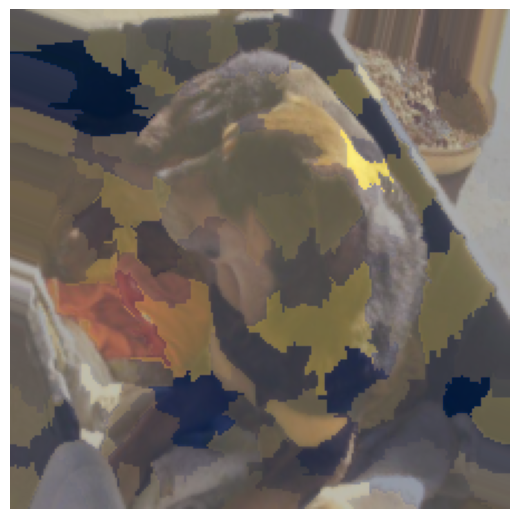

In [20]:
# define arbitrary parameters (common for all methods)
common_parameters = {
    "model": model,
    "batch_size": 16,
    "map_to_interpret_space": None,  # will use the default function
    "nb_samples": 4000,
    "ref_value": None,  # default value  will use (0.5, 0.5, 0.5) for images
}

# instanciate one explainer for each method
explainer = {
    "KernelShap": KernelShap(**common_parameters),
}

# iterate on all methods
for method_name, explainer in explainer.items():
    # compute explanation by calling the explainer
    explanation = explainer.explain(x, y)

    # visualize explanation with plot_explanation() function
    print(method_name)
    plot_attributions(explanation, x, img_size=5, cmap='cividis', cols=1, alpha=0.6)
    plt.show()

### Common parameters influence</a>

This section will present the influence of each common parameters parameters between Lime and KernelShap, it will be accompanied by visualization to illustrate it. Each parameter will be described one by one.

The KernelShap method inherit from the Lime method and set several parameters of the perturbation function. As such the parameters of the KernelShap method are included in the parameters of Lime and they are the one considered as the common parameters. Their influences are similar between both method, as such, we will use the Kernelshap method to dig into those parameters.

The [lime specific parameters influence](#lime_influence) are treated afterward.

### **batch_size**

The `batch_size` parameter should be a positive integer, it indicates the number of perturbed images treated simultaneously.
- Too small values will increase the execution time.
- Too huge values may lead to out of memory errors.
This parameter should be set taking into account your hardware and the image size. The most simple solution is to used the same batch size you use during the training of your model.

### **map_to_interpret_space**

The `map_to_interpret_space` is a function used to obtained the interpretable representation of a sample. In practice, it groups features of an input corresponding to the same interpretable feature (e.g super-pixel). It segments the image in super-pixels. Those super-pixel should group coherent pixels together (i.e the eye should be one super-pixel and the nose another one for our cat example).

It allows to transpose from (resp. to) the original input space to (resp. from) the interpretable space.

The default mappings are:

- the quickshift segmentation algorithm for inputs with (N,W,H,C) shape, we assume here such shape is used to represent (W,H,C) images.
- the felzenszwalb segmentation algorithm for inputs with (N,W,H) shape, we assume here such shape is used to represent (W,H) images.
- an identity mapping if inputs has shape (N,W), we assume here your inputs are tabular data.

If you have **time series**, you should also build an identity mapping, see at the end of [the documentation](https://deel-ai.github.io/xplique/api/attributions/lime/) for more information.

Our mappings come from `skimage.segmentation`, you can find a [comparison on sciket_image.org](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html).

map_to_interpret_space: Default (quickshift)


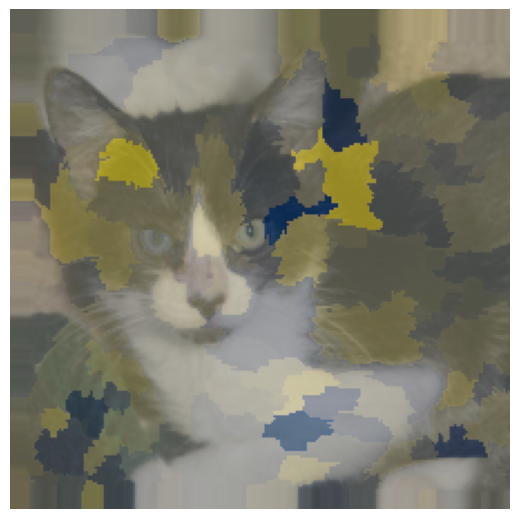

map_to_interpret_space: Quickshift


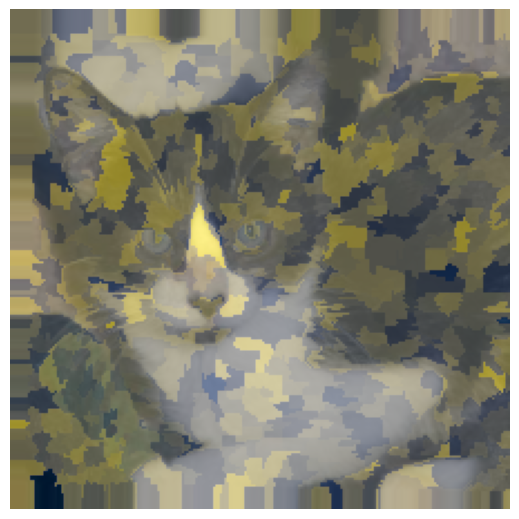

map_to_interpret_space: Felzenszwalb


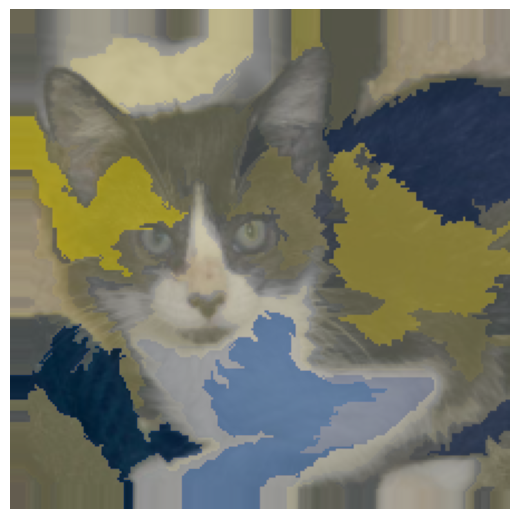

map_to_interpret_space: Slic


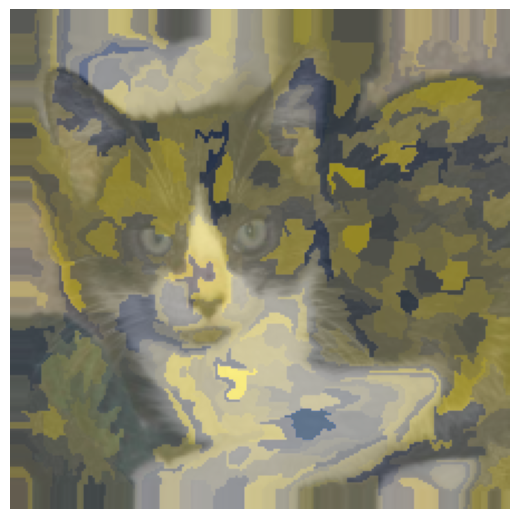

map_to_interpret_space: WaterShed


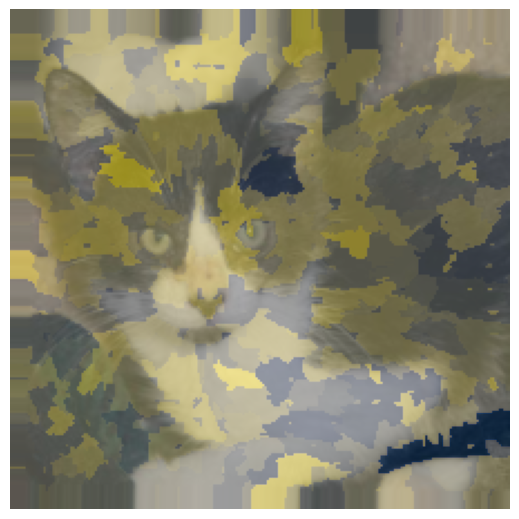

In [15]:
batch_size = 16
map_to_interpret_spaces = {
    "Default (quickshift)": None,  # will use the default function, which is quickshift
    "Quickshift": lambda inp: tf.cast(quickshift(inp.numpy().astype('double'), ratio=0.5, kernel_size=1, max_dist=5), tf.int32),
    "Felzenszwalb": lambda inp: tf.cast(felzenszwalb(inp.numpy().astype('double'), scale=75, sigma=0.5, min_size=30), tf.int32),
    "Slic": lambda inp: tf.cast(slic(inp.numpy().astype('double'), n_segments=500, compactness=1, sigma=1, start_label=1), tf.int32),
    "WaterShed": lambda inp: tf.cast(watershed(sobel(rgb2gray(inp.numpy().astype('double'))), markers=500, compactness=0.0001), tf.int32),
}
nb_samples = 5000
ref_value = tf.fill((x.shape[-1]), 0.5)

for name, mapping in map_to_interpret_spaces.items():
    t = time()
    explainer = KernelShap(model,
                           map_to_interpret_space=mapping,
                           batch_size=batch_size,
                           nb_samples=nb_samples,
                           ref_value=ref_value)

    explanation = explainer.explain(x, y)
    print(f"map_to_interpret_space: {name}")

    plot_attributions(explanation, x, img_size=5, cmap='cividis', alpha=0.6)
    plt.show()

### **nb_samples**

The `nb_samples` parameter is a positive integer indicating the number of different noise generated to build the estimator of the gradient. As known in probability:
- A too small number of sample will not provide a precise enough estimator, thus leading to noisy explanations.
- A too large number of sample can only have a good impact on the explanation, however it will impact the computation time linearly.

If the time computed in the following example are not linearly increasing with `nb_samples`, it is because of the colab computation ressource access that is not regular.

nb_samples: 200 -> 0.5065s


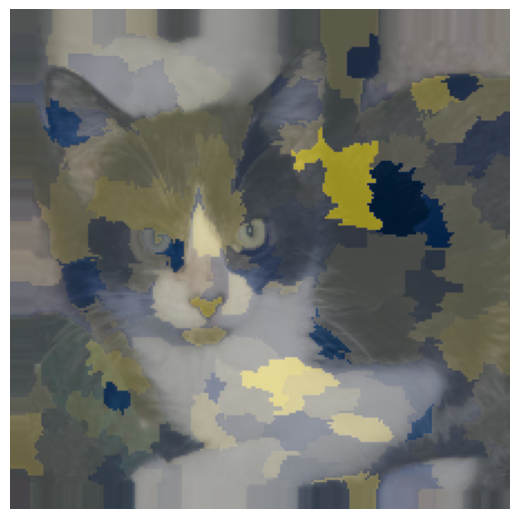

nb_samples: 1000 -> 2.5705s


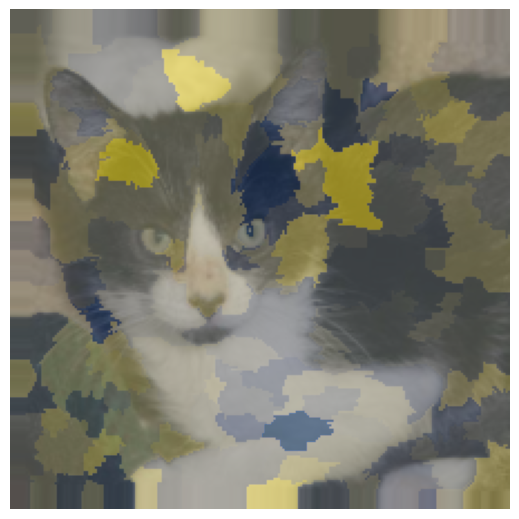

nb_samples: 4000 -> 8.2781s


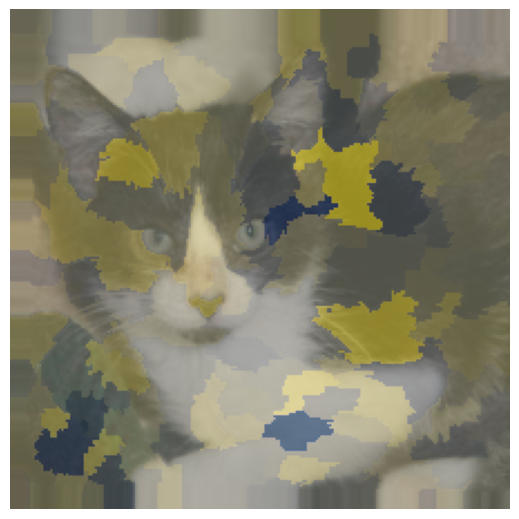

nb_samples: 10000 -> 21.4221s


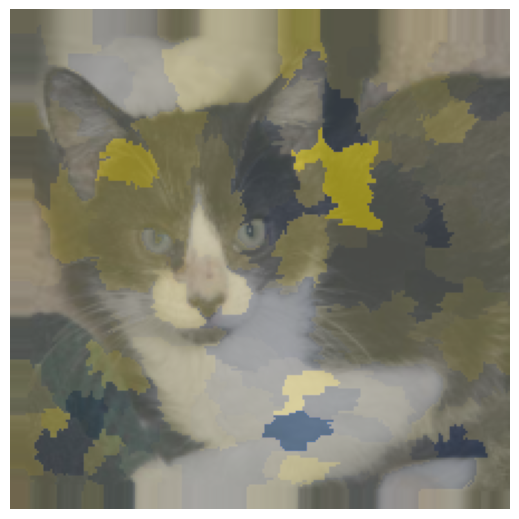

nb_samples: 25000 -> 55.7026s


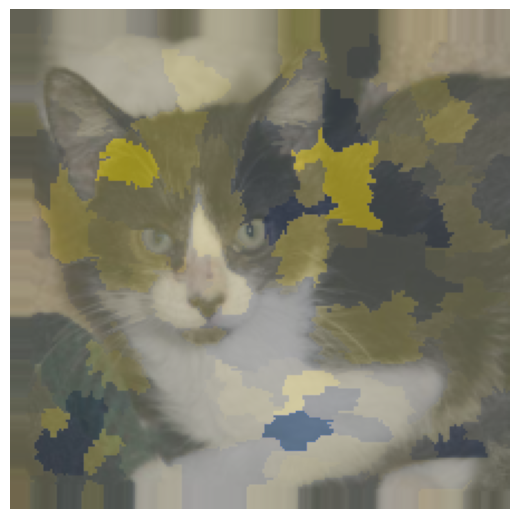

In [16]:
batch_size = 16
map_to_interpret_space = None  # default function
nb_samples_list = [200, 1000, 4000, 10000, 25000]
ref_value = None  # default value (0.5, 0.5, 0.5)

for nb_samples in nb_samples_list:
    t = time()
    explainer = KernelShap(model,
                           map_to_interpret_space=map_to_interpret_space,
                           batch_size=batch_size,
                           nb_samples=nb_samples,
                           ref_value=ref_value)

    explanation = explainer.explain(x, y)
    print(f"nb_samples: {nb_samples} -> {round(time()-t, 4)}s")

    plot_attributions(explanation, x, img_size=5, cmap='cividis', alpha=0.6)
    plt.show()

### **ref_value**

The `ref_value` parameter defines the reference value which replaces each feature when the corresponding interpretable feature is set to 0.

It should be provided as: a ndarray of shape (1) if there is no channels in your input and (C,) otherwise. The default ref value is set to (0.5, 0.5, 0.5) for inputs with 3 channels (corresponding to a grey pixel when inputs are normalized by 255) and to 0 otherwise.

It is similar to the `occlusion_value` from the Occlusion method. The the value should represent non-information. As such, 0 is often used.

However, many values could make sense, the mean or median of your values, the minimum or maximum of your values or even the middle between minimum and maximum.

We suggest that if you have several channels, you should represent the same thing (i.e all zeros or all means along the channel).


ref_value: [0. 0. 0.]


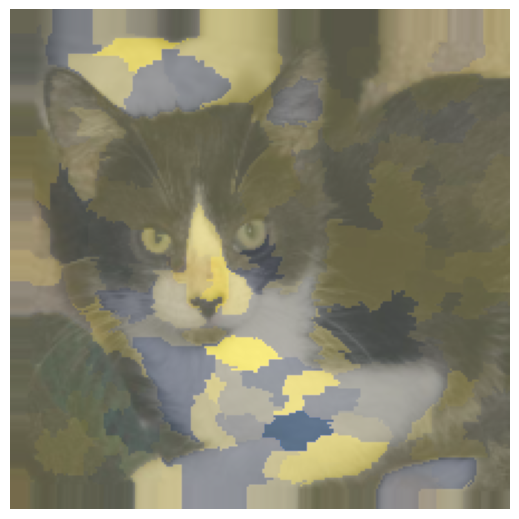

ref_value: [0.5 0.5 0.5]


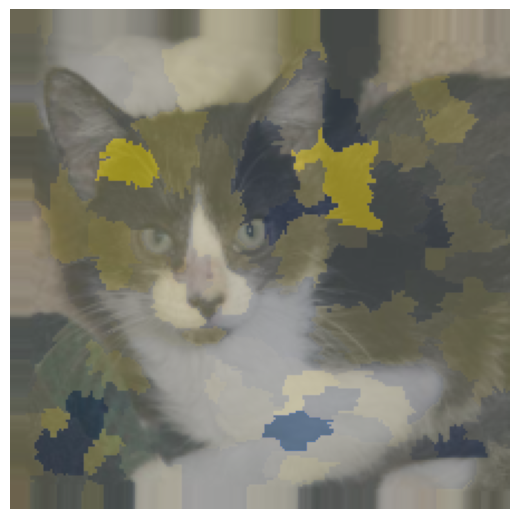

ref_value: [1. 1. 1.]


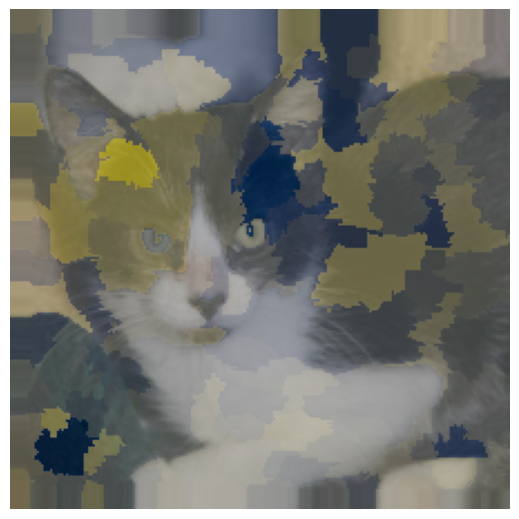

In [17]:
batch_size = 16
map_to_interpret_space = None  # default function
nb_samples_list = 4000
# We have channels with 3 dimensions, ref_value should be the same
ref_values = [
    tf.fill((x.shape[-1]), 0.0),
    tf.fill((x.shape[-1]), 0.5),  # Default value
    tf.fill((x.shape[-1]), 1.0),
]

for ref_value in ref_values:
    explainer = KernelShap(model,
                           map_to_interpret_space=map_to_interpret_space,
                           batch_size=batch_size,
                           nb_samples=nb_samples,
                           ref_value=ref_value)

    explanation = explainer.explain(x, y)
    print(f"ref_value: {ref_value}")

    plot_attributions(explanation, x, img_size=5, cmap='cividis', alpha=0.6)
    plt.show()